# Module 10 Challenge: SurfsUp

## Part 1: Analyze and Explore the Climate Data

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, distinct

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
Base = automap_base() 
# reflect an existing database into a new model
Base.prepare(autoload_with=engine) 
# reflect the tables

In [6]:
# View all of the classes that automap found
Base.classes.keys() 

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

## Climate Analysis

In [9]:
inspector = inspect(engine)

### Precipitation Analysis

Measurement is the precip data

In [10]:
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [12]:
### Using that date, get the previous 12 months of precipitation data 
##### by querying the previous 12 months of data.

prev12_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date <= '2017-08-23').\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()

pprint(prev12_prcp)

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [13]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prev12_prcp, columns = ["Date", "Precipitation (in.)"])

In [14]:
# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by=["Date"])
prcp_df

,Date,Precipitation (in.)
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2221,2017-08-23,0.08
2219,2017-08-23,0.00
2220,2017-08-23,0.00


In [15]:
prcp_df.dtypes

Date                    object
Precipitation (in.)    float64
dtype: object

In [16]:
prcp_df.Date = pd.to_datetime(prcp_df.Date, format="%Y/%m/%d")
prcp_df.set_index('Date', inplace=True)

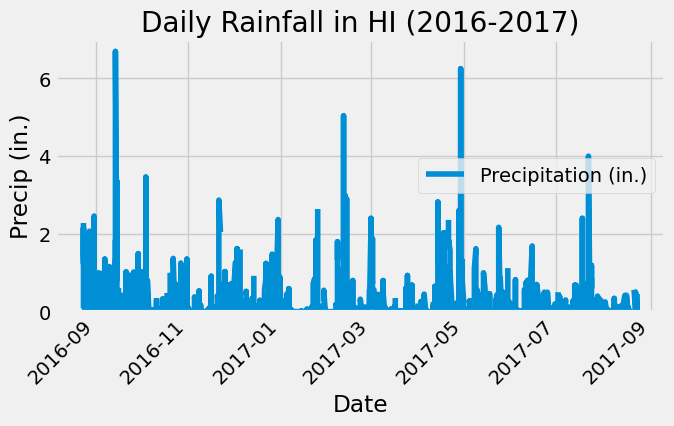

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
## Create the first bar chart with the Pandas DataFrame.plot() method.
prcp_plot  = prcp_df.plot(figsize = (7,4), ylim=(0,7), title = "Daily Rainfall in HI (2016-2017)", rot = 45)

# Give our chart some labels and a tile
prcp_plot.set_xlabel("Date")
prcp_plot.set_ylabel("Precip (in.)")

plt.savefig("Images/precipitation_bar.png")
plt.show()

In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation (in.)
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Station Analysis

Station is the still part of measurement data

In [19]:
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [20]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station).count

<bound method Query.count of <sqlalchemy.orm.query.Query object at 0x000001F5EB91F580>>

In [21]:
# This is not what they meant, still using the Measurement data
session.query(func.count(distinct(Measurement.station))).all()

[(9,)]

In [22]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

active_stations = session.query(Measurement.station, func.count(Measurement.id)).\
    group_by(Measurement.station).\
    order_by(Measurement.date > '2016-08-23').\
    order_by(func.count(Measurement.id).desc()).all()

pprint(active_stations)

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]


In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# USC00519281

station_temp_sum = session.query(Measurement.station, func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').\
    group_by(Measurement.station)

for station in station_temp_sum:
    print(station)

('USC00519281', 54.0, 85.0, 71.66378066378067)


In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
## and plot the results as a histogram
station_temp_year = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281', ).\
    filter(Measurement.date <= '2017-08-23').\
    filter(Measurement.date > '2016-08-23').\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
station_TempYr_df = pd.DataFrame(station_temp_year, columns = ['Date', 'Temperature'])
station_TempYr_df

,Date,Temperature
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
...,...,...
346,2017-08-14,77.0
347,2017-08-15,77.0
348,2017-08-16,76.0
349,2017-08-17,76.0


In [25]:
# Sort the dataframe by date
station_TempYr_df = station_TempYr_df.sort_values(by=["Date"])
station_TempYr_df.head()

,Date,Temperature
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0


In [26]:
station_TempYr_df.dtypes

Date            object
Temperature    float64
dtype: object

In [27]:
station_TempYr_df.Date = pd.to_datetime(station_TempYr_df.Date, format="%Y/%m/%d")
station_TempYr_df.set_index('Date', inplace=True)

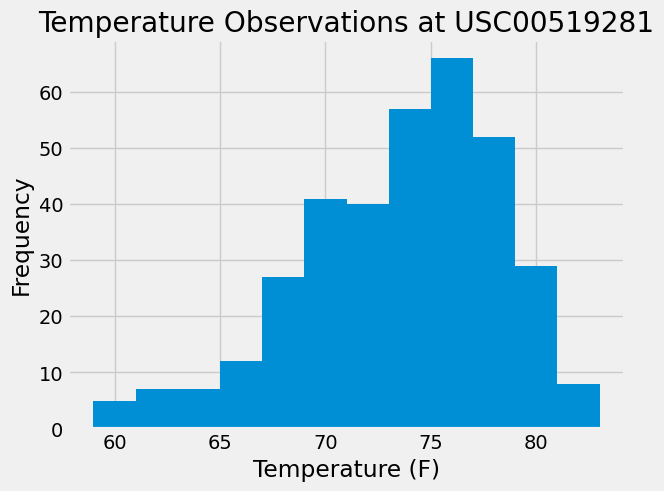

In [28]:
# Use Pandas Plotting with Matplotlib to plot the data
## Create the first bar chart with the Pandas DataFrame.plot() method.
plt.hist(station_TempYr_df['Temperature'], bins = 12, label = "TOBS")
plt.title("Temperature Observations at USC00519281")
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")

plt.savefig("Images/temp_hist.png")
plt.show()

In [29]:
# Use Pandas to calculate the summary statistics for the precipitation data
station_TempYr_df.describe()

,Temperature
count,351.000000
mean,73.096866
std,4.735491
min,59.000000
25%,70.000000
50%,74.000000
75%,77.000000
max,83.000000


In [ ]:
# Close Session
session.close()